<a href="https://colab.research.google.com/github/fejat/machine_learning_class_2021/blob/main/Supervised_learning_hand_written_digits_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supervised learning: recognising hand-written digits

### A short introduction to Scikit-learn

In [2]:
# sklearn offers datasets
from sklearn import datasets

import matplotlib.pyplot as plt

digits = datasets.load_digits()

In [3]:
# We print the first 4 images and their class
#digits contains 3 infos :
#digits.data
#digits.target
#digits.images
print(digits.data[:4])
print(digits.target[:4])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

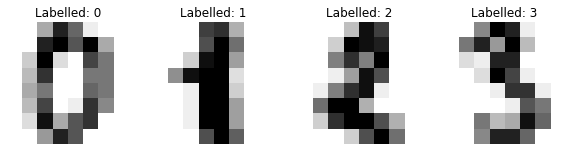

In [4]:
# The following function will be useful for visualisation
def print_four(images, predictions):
  _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
  for ax, image, label in zip(axes, images, predictions):
      ax.set_axis_off()
      if image.shape == (64,):
        image = image.reshape(8, 8) 
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      ax.set_title('Labelled: %i' % label)

# We print images and their actual targets
print_four(digits.images[:4], digits.target[:4])

In [5]:
from sklearn.model_selection import train_test_split

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, shuffle=True)

### Support Vector Machines (SVM)

In [6]:
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001)
# variants using other kernels:
# svc_classifier = svm.SVC(kernel='linear')
# svc_classifier = svm.SVC(kernel='poly', degree=3)
# svc_classifier = svm.SVC(kernel='rbf')

# Estimator.fit(X,Y)
# Learn from the training set
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

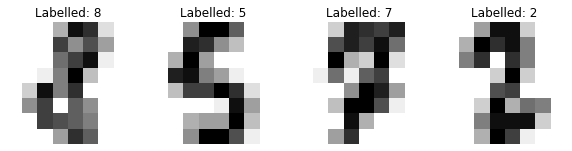

In [7]:
# Predict on the first four images in the test set
predicted_4 = svm_classifier.predict(X_test[:4])

print_four(X_test[:4], predicted_4)

In [9]:
# Predict on the whole test set
predicted = svm_classifier.predict(X_test)

# score = (predicted == y_test).sum()
# print("Correctly predict {:.2f}% of the test set".format(100 * score / len(predicted)))
print('SVM score: %.4f' % svm_classifier.score(X_test, y_test))


SVM score: 0.9878


In [10]:
from sklearn import metrics
print(f"Classification report for classifier {svm_classifier}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       0.97      1.00      0.98        84
           2       1.00      1.00      1.00        96
           3       1.00      0.99      0.99        90
           4       1.00      1.00      1.00        83
           5       0.99      0.98      0.98        85
           6       0.99      0.98      0.98        95
           7       0.98      0.99      0.98        91
           8       0.98      0.98      0.98        93
           9       0.98      0.97      0.97        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted a

Confusion matrix:
[[90  0  0  0  0  0  0  0  0  0]
 [ 0 84  0  0  0  0  0  0  0  0]
 [ 0  0 96  0  0  0  0  0  0  0]
 [ 0  0  0 89  0  0  0  1  0  0]
 [ 0  0  0  0 83  0  0  0  0  0]
 [ 0  0  0  0  0 83  1  0  0  1]
 [ 0  1  0  0  0  0 93  0  1  0]
 [ 0  0  0  0  0  0  0 90  0  1]
 [ 0  2  0  0  0  0  0  0 91  0]
 [ 0  0  0  0  0  1  0  1  1 89]]


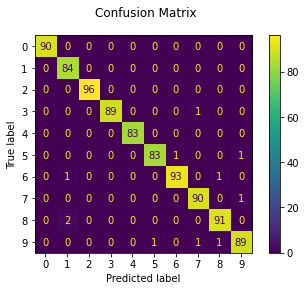

In [11]:
disp = metrics.plot_confusion_matrix(svm_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Cross-validation method

In [12]:
from sklearn.model_selection import KFold, cross_val_score
X = range(10)
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X):
  print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]


In [13]:
# Compute cross validation score:
[svm_classifier.fit(digits.data[train], digits.target[train]).score(digits.data[test], digits.target[test]) for train, test in k_fold.split(digits.data)]

[0.975,
 0.9527777777777777,
 0.9832869080779945,
 0.9916434540389972,
 0.958217270194986]

In [14]:
# All done in a nice one-liner
cross_val_score(svm_classifier, digits.data, digits.target, cv=k_fold)

array([0.975     , 0.95277778, 0.98328691, 0.99164345, 0.95821727])

### k-nearest neighbours (KNN)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3,p=1,metric='euclidean')

KNN score: 0.9833


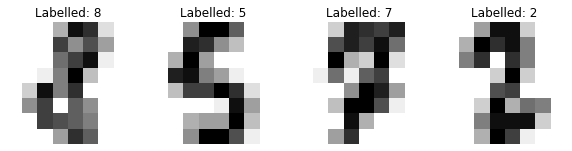

In [62]:
# Print four images and their predictions, and compute the score 
knn_classifier.fit(X_train, y_train)
predictions_knn_4=knn_classifier.predict(X_test[:4])

print_four(X_test[:4], predictions_knn_4)
print('KNN score: %.4f' % knn_classifier.score(X_test, y_test))


### Logistic regression

In [76]:
from sklearn import linear_model
LinearRegression=linear_model.LogisticRegression(max_iter=10000)

LogisticRegression score: 0.9644


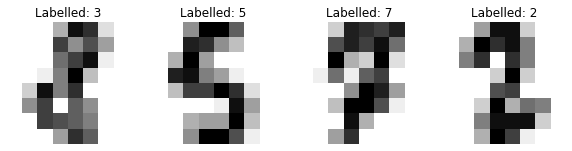

In [77]:
# Print four images and their predictions, and compute the score 

LinearRegression.fit(X_train, y_train)
predictions_lin_4=LinearRegression.predict(X_test[:4])

print_four(X_test[:4], predictions_lin_4)
print('LogisticRegression score: %.4f' % LinearRegression.score(X_test, y_test))

### Decision trees

In [78]:
from sklearn import tree

LogisticRegression score: 0.8376


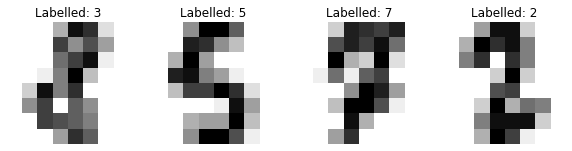

In [109]:
# Print four images and their predictions, and compute the score 
dec_tree=tree.DecisionTreeClassifier(criterion='gini',min_samples_split=3,min_weight_fraction_leaf=0.0001)

dec_tree.fit(X_train, y_train)
predictions_lin_4=dec_tree.predict(X_test[:4])

print_four(X_test[:4], predictions_lin_4)
print('LogisticRegression score: %.4f' % dec_tree.score(X_test, y_test))

### Neural networks

In [81]:
from sklearn.neural_network import MLPClassifier

MLP score: 0.9844


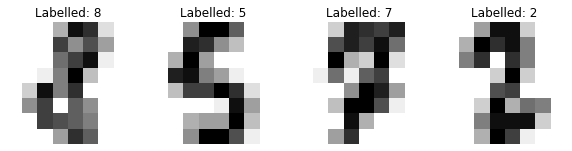

In [112]:
# Print four images and their predictions, and compute the score 

dec_tree=MLPClassifier(max_iter=1000000,hidden_layer_sizes=(4096,),random_state=1)

dec_tree.fit(X_train, y_train)
predictions_lin_4=dec_tree.predict(X_test[:4])

print_four(X_test[:4], predictions_lin_4)
print('MLP score: %.4f' % dec_tree.score(X_test, y_test))